#### This is the bi-class logistic regression for mushroom dataset classifying them as poisonous or edible using gradient descent algo..

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
#importing dataset using pandas
raw_data = pd.read_csv("../dataset/lung_cancer_examples.csv");

In [14]:
raw_data.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [15]:
print(raw_data.info())# to check the categorical data in the dataframe
raw_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
Name       59 non-null object
Surname    59 non-null object
Age        59 non-null int64
Smokes     59 non-null int64
AreaQ      59 non-null int64
Alkhol     59 non-null int64
Result     59 non-null int64
dtypes: int64(5), object(2)
memory usage: 3.3+ KB
None


(59, 7)

In [16]:
#applying data preprocessing to remove categorical data columns for now!!1
pure_raw_data = raw_data.iloc[:,2:raw_data.shape[1]] # fetching all the  necessary columns from the raw_data
pure_raw_data = pd.DataFrame(pure_raw_data)

In [17]:
total_size = pure_raw_data.shape[0]
train_index = int(0.7 * total_size)
train_index

41

In [18]:
#separating data into training ans testing
training_data = pure_raw_data.iloc[0:train_index]
pure_training_data = training_data.iloc[:,0:training_data.shape[1]-1]#creating pure training data withour class labels

testing_data = pure_raw_data[train_index:total_size]
pure_testing_data = testing_data.iloc[:,0:testing_data.shape[1]-1]#creating pure training data withour class labels
print(pure_training_data.head(),"\n\n\n",pure_testing_data.head())


   Age  Smokes  AreaQ  Alkhol
0   35       3      5       4
1   27      20      2       5
2   30       0      5       2
3   28       0      8       1
4   68       4      5       6 


     Age  Smokes  AreaQ  Alkhol
41   47      12      8       0
42   69      20      5       4
43   63      20      4       5
44   39      15      7       2
45   21      20      8       3


In [19]:
#separating class labels from pure training and testing data  
C_train = training_data["Result"]
C_train = np.array(C_train)
C_train = C_train.reshape(C_train.shape[0],1)

C_test  = testing_data["Result"]
C_test = np.array(C_test)
C_test = C_test.reshape(C_test.shape[0],1)
print("C_train:{}\nC_test:{}".format(C_train.shape,C_test.shape))

C_train:(41, 1)
C_test:(18, 1)


In [20]:
#applying feature scaling or normalization on data  by Dividing Each Row of Training Data with respective Row Maximium Value to Normalize the Dataset
pure_training_data = np.array(pure_training_data)
pure_training_data = pure_training_data/np.max(pure_training_data,axis=0)
pure_testing_data = np.array(pure_testing_data)
pure_testing_data = pure_testing_data/np.max(pure_testing_data,axis=0)
print(pure_training_data.shape,"\n",pure_testing_data.shape)


(41, 4) 
 (18, 4)


In [21]:
#applying gradient descent algorithm 
alpha = 0.1      # learning rate hyperparameter
epsilon = 0.0000001# error tolerance hyperparameter


Q0_initial = np.random.randn(1,1)
Q1_initial = np.random.randn(pure_training_data.shape[1],1)
print(Q0_initial.shape,Q1_initial.shape)

(1, 1) (4, 1)


In [22]:
N = pure_training_data.shape[0]
x = pure_training_data.T
i=0
iterations=[]
loss = []


while (True):
    power = Q0_initial + np.matmul(pure_training_data,Q1_initial)
    sigmoid_function = 1/(1 + np.exp(-power))
    dels = sigmoid_function - C_train
    c = np.dot(x,dels)

    cost_function_theta0 = np.mean(dels)
    cost_function_theta1 = np.mean(c)

    #putting values of derivattive in gradient descent
    Q0_new = Q0_initial - (alpha * cost_function_theta0)
    Q1_new = Q1_initial - (alpha * cost_function_theta1)

    function_old = (-np.matmul(C_train.T,np.log(sigmoid_function))- np.matmul((1-C_train).T,np.log(1-sigmoid_function)))/N


    power_final = Q0_new + np.matmul(pure_training_data,Q1_new)
    sigmoid_function_new = 1/(1 + np.exp(-power_final))
    function_new = (-np.matmul(C_train.T,np.log(sigmoid_function_new))- np.matmul((1-C_train).T,np.log(1-sigmoid_function_new)))/N 
    
    if abs(function_new-function_old)<epsilon:
        break
    i += 1
    iterations.append(i)
    loss.append(function_old)
    print("The cost function {} in iteration {}".format(function_old,i))
    Q0_initial = Q0_new
    Q1_initial = Q1_new



The cost function [[1.59016565]] in iteration 1
The cost function [[1.01343128]] in iteration 2
The cost function [[0.89131163]] in iteration 3
The cost function [[0.88984162]] in iteration 4
The cost function [[0.88907163]] in iteration 5
The cost function [[0.8883035]] in iteration 6
The cost function [[0.88753708]] in iteration 7
The cost function [[0.88677235]] in iteration 8
The cost function [[0.88600931]] in iteration 9
The cost function [[0.88524797]] in iteration 10
The cost function [[0.88448831]] in iteration 11
The cost function [[0.88373034]] in iteration 12
The cost function [[0.88297405]] in iteration 13
The cost function [[0.88221945]] in iteration 14
The cost function [[0.88146652]] in iteration 15
The cost function [[0.88071527]] in iteration 16
The cost function [[0.87996569]] in iteration 17
The cost function [[0.87921778]] in iteration 18
The cost function [[0.87847155]] in iteration 19
The cost function [[0.87772697]] in iteration 20
The cost function [[0.87698407

The cost function [[0.76236576]] in iteration 212
The cost function [[0.76189115]] in iteration 213
The cost function [[0.76141767]] in iteration 214
The cost function [[0.76094532]] in iteration 215
The cost function [[0.76047409]] in iteration 216
The cost function [[0.76000398]] in iteration 217
The cost function [[0.75953499]] in iteration 218
The cost function [[0.75906711]] in iteration 219
The cost function [[0.75860035]] in iteration 220
The cost function [[0.75813469]] in iteration 221
The cost function [[0.75767014]] in iteration 222
The cost function [[0.7572067]] in iteration 223
The cost function [[0.75674435]] in iteration 224
The cost function [[0.75628311]] in iteration 225
The cost function [[0.75582296]] in iteration 226
The cost function [[0.75536391]] in iteration 227
The cost function [[0.75490594]] in iteration 228
The cost function [[0.75444907]] in iteration 229
The cost function [[0.75399328]] in iteration 230
The cost function [[0.75353857]] in iteration 231
T

The cost function [[0.67285178]] in iteration 461
The cost function [[0.67258606]] in iteration 462
The cost function [[0.67232093]] in iteration 463
The cost function [[0.6720564]] in iteration 464
The cost function [[0.67179246]] in iteration 465
The cost function [[0.67152911]] in iteration 466
The cost function [[0.67126635]] in iteration 467
The cost function [[0.67100417]] in iteration 468
The cost function [[0.67074258]] in iteration 469
The cost function [[0.67048158]] in iteration 470
The cost function [[0.67022116]] in iteration 471
The cost function [[0.66996132]] in iteration 472
The cost function [[0.66970205]] in iteration 473
The cost function [[0.66944337]] in iteration 474
The cost function [[0.66918526]] in iteration 475
The cost function [[0.66892773]] in iteration 476
The cost function [[0.66867077]] in iteration 477
The cost function [[0.66841438]] in iteration 478
The cost function [[0.66815856]] in iteration 479
The cost function [[0.66790331]] in iteration 480
T

The cost function [[0.63219301]] in iteration 647
The cost function [[0.63201494]] in iteration 648
The cost function [[0.63183724]] in iteration 649
The cost function [[0.63165991]] in iteration 650
The cost function [[0.63148293]] in iteration 651
The cost function [[0.63130633]] in iteration 652
The cost function [[0.63113008]] in iteration 653
The cost function [[0.6309542]] in iteration 654
The cost function [[0.63077868]] in iteration 655
The cost function [[0.63060351]] in iteration 656
The cost function [[0.63042871]] in iteration 657
The cost function [[0.63025426]] in iteration 658
The cost function [[0.63008018]] in iteration 659
The cost function [[0.62990644]] in iteration 660
The cost function [[0.62973307]] in iteration 661
The cost function [[0.62956004]] in iteration 662
The cost function [[0.62938737]] in iteration 663
The cost function [[0.62921506]] in iteration 664
The cost function [[0.62904309]] in iteration 665
The cost function [[0.62887148]] in iteration 666
T

The cost function [[0.60613528]] in iteration 820
The cost function [[0.60600874]] in iteration 821
The cost function [[0.60588245]] in iteration 822
The cost function [[0.60575639]] in iteration 823
The cost function [[0.60563057]] in iteration 824
The cost function [[0.60550498]] in iteration 825
The cost function [[0.60537964]] in iteration 826
The cost function [[0.60525453]] in iteration 827
The cost function [[0.60512965]] in iteration 828
The cost function [[0.60500501]] in iteration 829
The cost function [[0.60488061]] in iteration 830
The cost function [[0.60475644]] in iteration 831
The cost function [[0.6046325]] in iteration 832
The cost function [[0.6045088]] in iteration 833
The cost function [[0.60438533]] in iteration 834
The cost function [[0.60426209]] in iteration 835
The cost function [[0.60413908]] in iteration 836
The cost function [[0.6040163]] in iteration 837
The cost function [[0.60389375]] in iteration 838
The cost function [[0.60377143]] in iteration 839
The

The cost function [[0.58151908]] in iteration 1060
The cost function [[0.58143669]] in iteration 1061
The cost function [[0.58135444]] in iteration 1062
The cost function [[0.58127233]] in iteration 1063
The cost function [[0.58119036]] in iteration 1064
The cost function [[0.58110852]] in iteration 1065
The cost function [[0.58102682]] in iteration 1066
The cost function [[0.58094527]] in iteration 1067
The cost function [[0.58086384]] in iteration 1068
The cost function [[0.58078256]] in iteration 1069
The cost function [[0.58070141]] in iteration 1070
The cost function [[0.5806204]] in iteration 1071
The cost function [[0.58053953]] in iteration 1072
The cost function [[0.58045879]] in iteration 1073
The cost function [[0.58037818]] in iteration 1074
The cost function [[0.58029771]] in iteration 1075
The cost function [[0.58021738]] in iteration 1076
The cost function [[0.58013718]] in iteration 1077
The cost function [[0.58005712]] in iteration 1078
The cost function [[0.57997719]]

The cost function [[0.56652149]] in iteration 1276
The cost function [[0.56646335]] in iteration 1277
The cost function [[0.5664053]] in iteration 1278
The cost function [[0.56634734]] in iteration 1279
The cost function [[0.56628946]] in iteration 1280
The cost function [[0.56623168]] in iteration 1281
The cost function [[0.56617399]] in iteration 1282
The cost function [[0.56611638]] in iteration 1283
The cost function [[0.56605887]] in iteration 1284
The cost function [[0.56600144]] in iteration 1285
The cost function [[0.5659441]] in iteration 1286
The cost function [[0.56588685]] in iteration 1287
The cost function [[0.56582968]] in iteration 1288
The cost function [[0.56577261]] in iteration 1289
The cost function [[0.56571562]] in iteration 1290
The cost function [[0.56565872]] in iteration 1291
The cost function [[0.5656019]] in iteration 1292
The cost function [[0.56554517]] in iteration 1293
The cost function [[0.56548853]] in iteration 1294
The cost function [[0.56543198]] i

The cost function [[0.55690766]] in iteration 1466
The cost function [[0.55686384]] in iteration 1467
The cost function [[0.55682007]] in iteration 1468
The cost function [[0.55677637]] in iteration 1469
The cost function [[0.55673273]] in iteration 1470
The cost function [[0.55668915]] in iteration 1471
The cost function [[0.55664564]] in iteration 1472
The cost function [[0.55660219]] in iteration 1473
The cost function [[0.5565588]] in iteration 1474
The cost function [[0.55651547]] in iteration 1475
The cost function [[0.5564722]] in iteration 1476
The cost function [[0.556429]] in iteration 1477
The cost function [[0.55638586]] in iteration 1478
The cost function [[0.55634278]] in iteration 1479
The cost function [[0.55629976]] in iteration 1480
The cost function [[0.5562568]] in iteration 1481
The cost function [[0.55621391]] in iteration 1482
The cost function [[0.55617107]] in iteration 1483
The cost function [[0.5561283]] in iteration 1484
The cost function [[0.55608558]] in i

The cost function [[0.55000163]] in iteration 1644
The cost function [[0.54996743]] in iteration 1645
The cost function [[0.54993326]] in iteration 1646
The cost function [[0.54989915]] in iteration 1647
The cost function [[0.54986508]] in iteration 1648
The cost function [[0.54983105]] in iteration 1649
The cost function [[0.54979707]] in iteration 1650
The cost function [[0.54976314]] in iteration 1651
The cost function [[0.54972926]] in iteration 1652
The cost function [[0.54969541]] in iteration 1653
The cost function [[0.54966162]] in iteration 1654
The cost function [[0.54962787]] in iteration 1655
The cost function [[0.54959416]] in iteration 1656
The cost function [[0.54956051]] in iteration 1657
The cost function [[0.54952689]] in iteration 1658
The cost function [[0.54949332]] in iteration 1659
The cost function [[0.5494598]] in iteration 1660
The cost function [[0.54942632]] in iteration 1661
The cost function [[0.54939289]] in iteration 1662
The cost function [[0.5493595]] 

The cost function [[0.54118934]] in iteration 1958
The cost function [[0.54116651]] in iteration 1959
The cost function [[0.54114371]] in iteration 1960
The cost function [[0.54112094]] in iteration 1961
The cost function [[0.5410982]] in iteration 1962
The cost function [[0.54107549]] in iteration 1963
The cost function [[0.5410528]] in iteration 1964
The cost function [[0.54103014]] in iteration 1965
The cost function [[0.54100751]] in iteration 1966
The cost function [[0.54098491]] in iteration 1967
The cost function [[0.54096234]] in iteration 1968
The cost function [[0.54093979]] in iteration 1969
The cost function [[0.54091727]] in iteration 1970
The cost function [[0.54089478]] in iteration 1971
The cost function [[0.54087232]] in iteration 1972
The cost function [[0.54084988]] in iteration 1973
The cost function [[0.54082747]] in iteration 1974
The cost function [[0.54080509]] in iteration 1975
The cost function [[0.54078274]] in iteration 1976
The cost function [[0.54076041]] 

The cost function [[0.53550041]] in iteration 2254
The cost function [[0.53548434]] in iteration 2255
The cost function [[0.53546829]] in iteration 2256
The cost function [[0.53545226]] in iteration 2257
The cost function [[0.53543625]] in iteration 2258
The cost function [[0.53542025]] in iteration 2259
The cost function [[0.53540428]] in iteration 2260
The cost function [[0.53538832]] in iteration 2261
The cost function [[0.53537238]] in iteration 2262
The cost function [[0.53535646]] in iteration 2263
The cost function [[0.53534056]] in iteration 2264
The cost function [[0.53532467]] in iteration 2265
The cost function [[0.53530881]] in iteration 2266
The cost function [[0.53529296]] in iteration 2267
The cost function [[0.53527713]] in iteration 2268
The cost function [[0.53526131]] in iteration 2269
The cost function [[0.53524552]] in iteration 2270
The cost function [[0.53522974]] in iteration 2271
The cost function [[0.53521398]] in iteration 2272
The cost function [[0.53519824]

The cost function [[0.53122135]] in iteration 2570
The cost function [[0.53121002]] in iteration 2571
The cost function [[0.5311987]] in iteration 2572
The cost function [[0.5311874]] in iteration 2573
The cost function [[0.53117611]] in iteration 2574
The cost function [[0.53116483]] in iteration 2575
The cost function [[0.53115356]] in iteration 2576
The cost function [[0.53114231]] in iteration 2577
The cost function [[0.53113106]] in iteration 2578
The cost function [[0.53111983]] in iteration 2579
The cost function [[0.53110861]] in iteration 2580
The cost function [[0.53109741]] in iteration 2581
The cost function [[0.53108621]] in iteration 2582
The cost function [[0.53107503]] in iteration 2583
The cost function [[0.53106385]] in iteration 2584
The cost function [[0.53105269]] in iteration 2585
The cost function [[0.53104155]] in iteration 2586
The cost function [[0.53103041]] in iteration 2587
The cost function [[0.53101929]] in iteration 2588
The cost function [[0.53100818]] 

The cost function [[0.52905968]] in iteration 2783
The cost function [[0.52905062]] in iteration 2784
The cost function [[0.52904157]] in iteration 2785
The cost function [[0.52903253]] in iteration 2786
The cost function [[0.5290235]] in iteration 2787
The cost function [[0.52901448]] in iteration 2788
The cost function [[0.52900547]] in iteration 2789
The cost function [[0.52899647]] in iteration 2790
The cost function [[0.52898748]] in iteration 2791
The cost function [[0.52897849]] in iteration 2792
The cost function [[0.52896952]] in iteration 2793
The cost function [[0.52896055]] in iteration 2794
The cost function [[0.5289516]] in iteration 2795
The cost function [[0.52894265]] in iteration 2796
The cost function [[0.52893371]] in iteration 2797
The cost function [[0.52892478]] in iteration 2798
The cost function [[0.52891586]] in iteration 2799
The cost function [[0.52890695]] in iteration 2800
The cost function [[0.52889805]] in iteration 2801
The cost function [[0.52888916]] 

The cost function [[0.52686444]] in iteration 3061
The cost function [[0.5268576]] in iteration 3062
The cost function [[0.52685076]] in iteration 3063
The cost function [[0.52684392]] in iteration 3064
The cost function [[0.5268371]] in iteration 3065
The cost function [[0.52683028]] in iteration 3066
The cost function [[0.52682346]] in iteration 3067
The cost function [[0.52681666]] in iteration 3068
The cost function [[0.52680986]] in iteration 3069
The cost function [[0.52680307]] in iteration 3070
The cost function [[0.52679628]] in iteration 3071
The cost function [[0.5267895]] in iteration 3072
The cost function [[0.52678273]] in iteration 3073
The cost function [[0.52677596]] in iteration 3074
The cost function [[0.5267692]] in iteration 3075
The cost function [[0.52676245]] in iteration 3076
The cost function [[0.5267557]] in iteration 3077
The cost function [[0.52674896]] in iteration 3078
The cost function [[0.52674223]] in iteration 3079
The cost function [[0.5267355]] in i

The cost function [[0.52559167]] in iteration 3266
The cost function [[0.52558606]] in iteration 3267
The cost function [[0.52558046]] in iteration 3268
The cost function [[0.52557485]] in iteration 3269
The cost function [[0.52556926]] in iteration 3270
The cost function [[0.52556367]] in iteration 3271
The cost function [[0.52555808]] in iteration 3272
The cost function [[0.5255525]] in iteration 3273
The cost function [[0.52554693]] in iteration 3274
The cost function [[0.52554136]] in iteration 3275
The cost function [[0.5255358]] in iteration 3276
The cost function [[0.52553024]] in iteration 3277
The cost function [[0.52552469]] in iteration 3278
The cost function [[0.52551914]] in iteration 3279
The cost function [[0.5255136]] in iteration 3280
The cost function [[0.52550806]] in iteration 3281
The cost function [[0.52550253]] in iteration 3282
The cost function [[0.525497]] in iteration 3283
The cost function [[0.52549148]] in iteration 3284
The cost function [[0.52548596]] in 

The cost function [[0.52468645]] in iteration 3441
The cost function [[0.52468169]] in iteration 3442
The cost function [[0.52467694]] in iteration 3443
The cost function [[0.5246722]] in iteration 3444
The cost function [[0.52466745]] in iteration 3445
The cost function [[0.52466272]] in iteration 3446
The cost function [[0.52465798]] in iteration 3447
The cost function [[0.52465325]] in iteration 3448
The cost function [[0.52464853]] in iteration 3449
The cost function [[0.52464381]] in iteration 3450
The cost function [[0.52463909]] in iteration 3451
The cost function [[0.52463438]] in iteration 3452
The cost function [[0.52462967]] in iteration 3453
The cost function [[0.52462497]] in iteration 3454
The cost function [[0.52462027]] in iteration 3455
The cost function [[0.52461558]] in iteration 3456
The cost function [[0.52461089]] in iteration 3457
The cost function [[0.5246062]] in iteration 3458
The cost function [[0.52460152]] in iteration 3459
The cost function [[0.52459684]] 

The cost function [[0.52375506]] in iteration 3657
The cost function [[0.52375117]] in iteration 3658
The cost function [[0.52374727]] in iteration 3659
The cost function [[0.52374339]] in iteration 3660
The cost function [[0.5237395]] in iteration 3661
The cost function [[0.52373562]] in iteration 3662
The cost function [[0.52373174]] in iteration 3663
The cost function [[0.52372786]] in iteration 3664
The cost function [[0.52372399]] in iteration 3665
The cost function [[0.52372012]] in iteration 3666
The cost function [[0.52371626]] in iteration 3667
The cost function [[0.5237124]] in iteration 3668
The cost function [[0.52370854]] in iteration 3669
The cost function [[0.52370469]] in iteration 3670
The cost function [[0.52370084]] in iteration 3671
The cost function [[0.52369699]] in iteration 3672
The cost function [[0.52369315]] in iteration 3673
The cost function [[0.52368931]] in iteration 3674
The cost function [[0.52368547]] in iteration 3675
The cost function [[0.52368164]] 

The cost function [[0.52301271]] in iteration 3866
The cost function [[0.52300949]] in iteration 3867
The cost function [[0.52300626]] in iteration 3868
The cost function [[0.52300304]] in iteration 3869
The cost function [[0.52299982]] in iteration 3870
The cost function [[0.5229966]] in iteration 3871
The cost function [[0.52299339]] in iteration 3872
The cost function [[0.52299018]] in iteration 3873
The cost function [[0.52298697]] in iteration 3874
The cost function [[0.52298377]] in iteration 3875
The cost function [[0.52298057]] in iteration 3876
The cost function [[0.52297737]] in iteration 3877
The cost function [[0.52297417]] in iteration 3878
The cost function [[0.52297098]] in iteration 3879
The cost function [[0.52296779]] in iteration 3880
The cost function [[0.5229646]] in iteration 3881
The cost function [[0.52296141]] in iteration 3882
The cost function [[0.52295823]] in iteration 3883
The cost function [[0.52295505]] in iteration 3884
The cost function [[0.52295188]] 

The cost function [[0.5225254]] in iteration 4028
The cost function [[0.5225226]] in iteration 4029
The cost function [[0.52251981]] in iteration 4030
The cost function [[0.52251702]] in iteration 4031
The cost function [[0.52251423]] in iteration 4032
The cost function [[0.52251144]] in iteration 4033
The cost function [[0.52250866]] in iteration 4034
The cost function [[0.52250587]] in iteration 4035
The cost function [[0.52250309]] in iteration 4036
The cost function [[0.52250031]] in iteration 4037
The cost function [[0.52249754]] in iteration 4038
The cost function [[0.52249477]] in iteration 4039
The cost function [[0.522492]] in iteration 4040
The cost function [[0.52248923]] in iteration 4041
The cost function [[0.52248646]] in iteration 4042
The cost function [[0.5224837]] in iteration 4043
The cost function [[0.52248094]] in iteration 4044
The cost function [[0.52247818]] in iteration 4045
The cost function [[0.52247542]] in iteration 4046
The cost function [[0.52247267]] in 

The cost function [[0.52198368]] in iteration 4240
The cost function [[0.52198135]] in iteration 4241
The cost function [[0.52197903]] in iteration 4242
The cost function [[0.5219767]] in iteration 4243
The cost function [[0.52197438]] in iteration 4244
The cost function [[0.52197206]] in iteration 4245
The cost function [[0.52196975]] in iteration 4246
The cost function [[0.52196743]] in iteration 4247
The cost function [[0.52196512]] in iteration 4248
The cost function [[0.52196281]] in iteration 4249
The cost function [[0.5219605]] in iteration 4250
The cost function [[0.52195819]] in iteration 4251
The cost function [[0.52195589]] in iteration 4252
The cost function [[0.52195358]] in iteration 4253
The cost function [[0.52195128]] in iteration 4254
The cost function [[0.52194898]] in iteration 4255
The cost function [[0.52194668]] in iteration 4256
The cost function [[0.52194439]] in iteration 4257
The cost function [[0.5219421]] in iteration 4258
The cost function [[0.5219398]] in

The cost function [[0.52150522]] in iteration 4466
The cost function [[0.5215033]] in iteration 4467
The cost function [[0.52150138]] in iteration 4468
The cost function [[0.52149946]] in iteration 4469
The cost function [[0.52149755]] in iteration 4470
The cost function [[0.52149563]] in iteration 4471
The cost function [[0.52149372]] in iteration 4472
The cost function [[0.52149181]] in iteration 4473
The cost function [[0.5214899]] in iteration 4474
The cost function [[0.521488]] in iteration 4475
The cost function [[0.52148609]] in iteration 4476
The cost function [[0.52148419]] in iteration 4477
The cost function [[0.52148229]] in iteration 4478
The cost function [[0.52148039]] in iteration 4479
The cost function [[0.52147849]] in iteration 4480
The cost function [[0.52147659]] in iteration 4481
The cost function [[0.52147469]] in iteration 4482
The cost function [[0.5214728]] in iteration 4483
The cost function [[0.52147091]] in iteration 4484
The cost function [[0.52146902]] in 

The cost function [[0.52121435]] in iteration 4628
The cost function [[0.52121267]] in iteration 4629
The cost function [[0.521211]] in iteration 4630
The cost function [[0.52120933]] in iteration 4631
The cost function [[0.52120765]] in iteration 4632
The cost function [[0.52120598]] in iteration 4633
The cost function [[0.52120431]] in iteration 4634
The cost function [[0.52120265]] in iteration 4635
The cost function [[0.52120098]] in iteration 4636
The cost function [[0.52119932]] in iteration 4637
The cost function [[0.52119765]] in iteration 4638
The cost function [[0.52119599]] in iteration 4639
The cost function [[0.52119433]] in iteration 4640
The cost function [[0.52119267]] in iteration 4641
The cost function [[0.52119101]] in iteration 4642
The cost function [[0.52118936]] in iteration 4643
The cost function [[0.5211877]] in iteration 4644
The cost function [[0.52118605]] in iteration 4645
The cost function [[0.5211844]] in iteration 4646
The cost function [[0.52118275]] in

The cost function [[0.52072762]] in iteration 4960
The cost function [[0.52072634]] in iteration 4961
The cost function [[0.52072507]] in iteration 4962
The cost function [[0.5207238]] in iteration 4963
The cost function [[0.52072252]] in iteration 4964
The cost function [[0.52072125]] in iteration 4965
The cost function [[0.52071998]] in iteration 4966
The cost function [[0.52071871]] in iteration 4967
The cost function [[0.52071745]] in iteration 4968
The cost function [[0.52071618]] in iteration 4969
The cost function [[0.52071491]] in iteration 4970
The cost function [[0.52071365]] in iteration 4971
The cost function [[0.52071239]] in iteration 4972
The cost function [[0.52071112]] in iteration 4973
The cost function [[0.52070986]] in iteration 4974
The cost function [[0.5207086]] in iteration 4975
The cost function [[0.52070734]] in iteration 4976
The cost function [[0.52070608]] in iteration 4977
The cost function [[0.52070483]] in iteration 4978
The cost function [[0.52070357]] 

The cost function [[0.52039193]] in iteration 5256
The cost function [[0.52039093]] in iteration 5257
The cost function [[0.52038992]] in iteration 5258
The cost function [[0.52038892]] in iteration 5259
The cost function [[0.52038792]] in iteration 5260
The cost function [[0.52038692]] in iteration 5261
The cost function [[0.52038592]] in iteration 5262
The cost function [[0.52038492]] in iteration 5263
The cost function [[0.52038392]] in iteration 5264
The cost function [[0.52038292]] in iteration 5265
The cost function [[0.52038193]] in iteration 5266
The cost function [[0.52038093]] in iteration 5267
The cost function [[0.52037994]] in iteration 5268
The cost function [[0.52037894]] in iteration 5269
The cost function [[0.52037795]] in iteration 5270
The cost function [[0.52037695]] in iteration 5271
The cost function [[0.52037596]] in iteration 5272
The cost function [[0.52037497]] in iteration 5273
The cost function [[0.52037398]] in iteration 5274
The cost function [[0.52037299]

The cost function [[0.52022004]] in iteration 5440
The cost function [[0.52021918]] in iteration 5441
The cost function [[0.52021831]] in iteration 5442
The cost function [[0.52021745]] in iteration 5443
The cost function [[0.52021658]] in iteration 5444
The cost function [[0.52021572]] in iteration 5445
The cost function [[0.52021485]] in iteration 5446
The cost function [[0.52021399]] in iteration 5447
The cost function [[0.52021313]] in iteration 5448
The cost function [[0.52021226]] in iteration 5449
The cost function [[0.5202114]] in iteration 5450
The cost function [[0.52021054]] in iteration 5451
The cost function [[0.52020968]] in iteration 5452
The cost function [[0.52020882]] in iteration 5453
The cost function [[0.52020797]] in iteration 5454
The cost function [[0.52020711]] in iteration 5455
The cost function [[0.52020625]] in iteration 5456
The cost function [[0.5202054]] in iteration 5457
The cost function [[0.52020454]] in iteration 5458
The cost function [[0.52020368]] 

The cost function [[0.51999721]] in iteration 5727
The cost function [[0.51999652]] in iteration 5728
The cost function [[0.51999583]] in iteration 5729
The cost function [[0.51999514]] in iteration 5730
The cost function [[0.51999445]] in iteration 5731
The cost function [[0.51999376]] in iteration 5732
The cost function [[0.51999307]] in iteration 5733
The cost function [[0.51999238]] in iteration 5734
The cost function [[0.51999169]] in iteration 5735
The cost function [[0.51999101]] in iteration 5736
The cost function [[0.51999032]] in iteration 5737
The cost function [[0.51998963]] in iteration 5738
The cost function [[0.51998895]] in iteration 5739
The cost function [[0.51998826]] in iteration 5740
The cost function [[0.51998758]] in iteration 5741
The cost function [[0.51998689]] in iteration 5742
The cost function [[0.51998621]] in iteration 5743
The cost function [[0.51998552]] in iteration 5744
The cost function [[0.51998484]] in iteration 5745
The cost function [[0.51998416]

The cost function [[0.5197973]] in iteration 6054
The cost function [[0.51979676]] in iteration 6055
The cost function [[0.51979623]] in iteration 6056
The cost function [[0.51979569]] in iteration 6057
The cost function [[0.51979515]] in iteration 6058
The cost function [[0.51979462]] in iteration 6059
The cost function [[0.51979408]] in iteration 6060
The cost function [[0.51979355]] in iteration 6061
The cost function [[0.51979301]] in iteration 6062
The cost function [[0.51979248]] in iteration 6063
The cost function [[0.51979195]] in iteration 6064
The cost function [[0.51979141]] in iteration 6065
The cost function [[0.51979088]] in iteration 6066
The cost function [[0.51979035]] in iteration 6067
The cost function [[0.51978982]] in iteration 6068
The cost function [[0.51978929]] in iteration 6069
The cost function [[0.51978876]] in iteration 6070
The cost function [[0.51978822]] in iteration 6071
The cost function [[0.51978769]] in iteration 6072
The cost function [[0.51978716]]

The cost function [[0.51964692]] in iteration 6369
The cost function [[0.51964649]] in iteration 6370
The cost function [[0.51964607]] in iteration 6371
The cost function [[0.51964565]] in iteration 6372
The cost function [[0.51964523]] in iteration 6373
The cost function [[0.51964481]] in iteration 6374
The cost function [[0.51964439]] in iteration 6375
The cost function [[0.51964397]] in iteration 6376
The cost function [[0.51964355]] in iteration 6377
The cost function [[0.51964313]] in iteration 6378
The cost function [[0.51964271]] in iteration 6379
The cost function [[0.51964229]] in iteration 6380
The cost function [[0.51964187]] in iteration 6381
The cost function [[0.51964145]] in iteration 6382
The cost function [[0.51964104]] in iteration 6383
The cost function [[0.51964062]] in iteration 6384
The cost function [[0.5196402]] in iteration 6385
The cost function [[0.51963978]] in iteration 6386
The cost function [[0.51963937]] in iteration 6387
The cost function [[0.51963895]]

The cost function [[0.51953798]] in iteration 6656
The cost function [[0.51953764]] in iteration 6657
The cost function [[0.5195373]] in iteration 6658
The cost function [[0.51953696]] in iteration 6659
The cost function [[0.51953662]] in iteration 6660
The cost function [[0.51953628]] in iteration 6661
The cost function [[0.51953594]] in iteration 6662
The cost function [[0.5195356]] in iteration 6663
The cost function [[0.51953527]] in iteration 6664
The cost function [[0.51953493]] in iteration 6665
The cost function [[0.51953459]] in iteration 6666
The cost function [[0.51953425]] in iteration 6667
The cost function [[0.51953392]] in iteration 6668
The cost function [[0.51953358]] in iteration 6669
The cost function [[0.51953324]] in iteration 6670
The cost function [[0.51953291]] in iteration 6671
The cost function [[0.51953257]] in iteration 6672
The cost function [[0.51953224]] in iteration 6673
The cost function [[0.5195319]] in iteration 6674
The cost function [[0.51953157]] i

The cost function [[0.51943913]] in iteration 6984
The cost function [[0.51943886]] in iteration 6985
The cost function [[0.5194386]] in iteration 6986
The cost function [[0.51943833]] in iteration 6987
The cost function [[0.51943807]] in iteration 6988
The cost function [[0.5194378]] in iteration 6989
The cost function [[0.51943754]] in iteration 6990
The cost function [[0.51943727]] in iteration 6991
The cost function [[0.51943701]] in iteration 6992
The cost function [[0.51943674]] in iteration 6993
The cost function [[0.51943648]] in iteration 6994
The cost function [[0.51943622]] in iteration 6995
The cost function [[0.51943595]] in iteration 6996
The cost function [[0.51943569]] in iteration 6997
The cost function [[0.51943543]] in iteration 6998
The cost function [[0.51943516]] in iteration 6999
The cost function [[0.5194349]] in iteration 7000
The cost function [[0.51943464]] in iteration 7001
The cost function [[0.51943437]] in iteration 7002
The cost function [[0.51943411]] i

The cost function [[0.5193615]] in iteration 7313
The cost function [[0.51936129]] in iteration 7314
The cost function [[0.51936109]] in iteration 7315
The cost function [[0.51936088]] in iteration 7316
The cost function [[0.51936067]] in iteration 7317
The cost function [[0.51936046]] in iteration 7318
The cost function [[0.51936025]] in iteration 7319
The cost function [[0.51936005]] in iteration 7320
The cost function [[0.51935984]] in iteration 7321
The cost function [[0.51935963]] in iteration 7322
The cost function [[0.51935943]] in iteration 7323
The cost function [[0.51935922]] in iteration 7324
The cost function [[0.51935901]] in iteration 7325
The cost function [[0.51935881]] in iteration 7326
The cost function [[0.5193586]] in iteration 7327
The cost function [[0.51935839]] in iteration 7328
The cost function [[0.51935819]] in iteration 7329
The cost function [[0.51935798]] in iteration 7330
The cost function [[0.51935778]] in iteration 7331
The cost function [[0.51935757]] 

The cost function [[0.51931151]] in iteration 7577
The cost function [[0.51931134]] in iteration 7578
The cost function [[0.51931116]] in iteration 7579
The cost function [[0.51931099]] in iteration 7580
The cost function [[0.51931082]] in iteration 7581
The cost function [[0.51931065]] in iteration 7582
The cost function [[0.51931048]] in iteration 7583
The cost function [[0.51931031]] in iteration 7584
The cost function [[0.51931014]] in iteration 7585
The cost function [[0.51930997]] in iteration 7586
The cost function [[0.5193098]] in iteration 7587
The cost function [[0.51930963]] in iteration 7588
The cost function [[0.51930946]] in iteration 7589
The cost function [[0.51930929]] in iteration 7590
The cost function [[0.51930912]] in iteration 7591
The cost function [[0.51930895]] in iteration 7592
The cost function [[0.51930878]] in iteration 7593
The cost function [[0.51930861]] in iteration 7594
The cost function [[0.51930844]] in iteration 7595
The cost function [[0.51930827]]

The cost function [[0.51927202]] in iteration 7829
The cost function [[0.51927187]] in iteration 7830
The cost function [[0.51927173]] in iteration 7831
The cost function [[0.51927159]] in iteration 7832
The cost function [[0.51927145]] in iteration 7833
The cost function [[0.5192713]] in iteration 7834
The cost function [[0.51927116]] in iteration 7835
The cost function [[0.51927102]] in iteration 7836
The cost function [[0.51927088]] in iteration 7837
The cost function [[0.51927074]] in iteration 7838
The cost function [[0.51927059]] in iteration 7839
The cost function [[0.51927045]] in iteration 7840
The cost function [[0.51927031]] in iteration 7841
The cost function [[0.51927017]] in iteration 7842
The cost function [[0.51927003]] in iteration 7843
The cost function [[0.51926989]] in iteration 7844
The cost function [[0.51926975]] in iteration 7845
The cost function [[0.51926961]] in iteration 7846
The cost function [[0.51926946]] in iteration 7847
The cost function [[0.51926932]]

The cost function [[0.51923116]] in iteration 8150
The cost function [[0.51923105]] in iteration 8151
The cost function [[0.51923093]] in iteration 8152
The cost function [[0.51923082]] in iteration 8153
The cost function [[0.51923071]] in iteration 8154
The cost function [[0.51923059]] in iteration 8155
The cost function [[0.51923048]] in iteration 8156
The cost function [[0.51923037]] in iteration 8157
The cost function [[0.51923026]] in iteration 8158
The cost function [[0.51923014]] in iteration 8159
The cost function [[0.51923003]] in iteration 8160
The cost function [[0.51922992]] in iteration 8161
The cost function [[0.51922981]] in iteration 8162
The cost function [[0.5192297]] in iteration 8163
The cost function [[0.51922958]] in iteration 8164
The cost function [[0.51922947]] in iteration 8165
The cost function [[0.51922936]] in iteration 8166
The cost function [[0.51922925]] in iteration 8167
The cost function [[0.51922914]] in iteration 8168
The cost function [[0.51922903]]

In [23]:
print(Q0_new,"\n\n\n",Q1_new)

[[-8.54551909]] 


 [[3.961098  ]
 [4.82587419]
 [4.32569199]
 [3.61748926]]


In [24]:
len(iterations)

8318

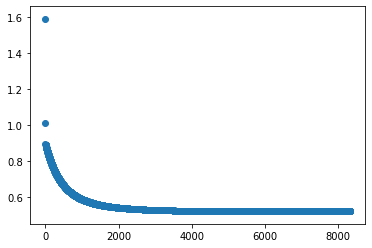

In [25]:
plt.scatter(iterations,loss)

### performing testing 

In [30]:
p =Q0_new +np.dot(pure_testing_data,Q1_new)


In [27]:
p

array([[-0.57939677],
       [ 2.05469263],
       [ 1.71758935],
       [-0.14138712],
       [ 0.5751479 ],
       [ 2.02239482],
       [-3.31102913],
       [ 1.26005361],
       [ 2.59896512],
       [-0.8935035 ],
       [ 1.16983915],
       [ 1.71599041],
       [-1.05092211],
       [-2.02683748],
       [ 2.46623527],
       [ 1.1445835 ],
       [ 2.98403352],
       [ 1.95219419]])

In [28]:
sigmoid_testing = ((1)/(1+np.exp(-p)))


In [18]:

greater=[]
for i in range(sigmoid_testing.shape[0]):
  if sigmoid_testing[i]>=0.5:
    greater.append(int(1))
  else:
    greater.append(int(0))
#print(greater)
greater = np.array(greater)
np.count_nonzero(greater)

14

In [19]:
greater = greater.reshape(greater.shape[0],1)
greater.shape

(18, 1)

In [20]:
C_test=np.array(C_test)
np.count_nonzero(C_test)

9

In [21]:
np.count_nonzero(greater == C_test)/ C_test.shape[0]

0.7222222222222222

In [22]:
print("Accuracy : ", round(np.count_nonzero(greater == C_test) / C_test.shape[0] * 100 , 2) , " %")

Accuracy :  72.22  %


In [23]:
24+96+112

232

In [24]:
68+63+21


152

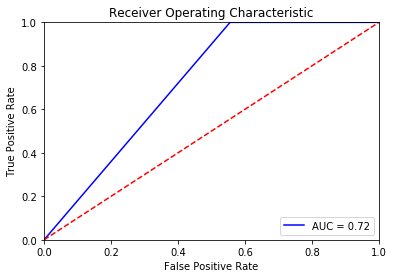

In [26]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(C_test, greater)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()